In [1]:
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

clf = joblib.load("../output/clf.pkl")
train = joblib.load("../output/train_anomaly.pkl")
df = joblib.load("../output/train_anomaly.pkl")
test = joblib.load("../output/test_anomaly.pkl")

In [3]:
train.head()

,timestamp,value,date,year,month,day,hour,minute,cluster,anomaly,score
0,2013-12-02 21:15:00,73.967322,2013-12-02,2013,12,2,21,15,1,1,0.032292
1,2013-12-02 21:20:00,74.935882,2013-12-02,2013,12,2,21,20,1,1,0.035444
2,2013-12-02 21:25:00,76.124162,2013-12-02,2013,12,2,21,25,1,1,0.035231
3,2013-12-02 21:30:00,78.140707,2013-12-02,2013,12,2,21,30,1,1,0.038891
4,2013-12-02 21:35:00,79.329836,2013-12-02,2013,12,2,21,35,1,1,0.046893


Numbers of Anomaly Detected on Train and Test Data

In [5]:
print(train['anomaly'].value_counts())
print(test['anomaly'].value_counts())

 1    17248
-1      908
Name: anomaly, dtype: int64
 1    3780
-1     759
Name: anomaly, dtype: int64


The Minimal and Maximal value of temperature from anomaly point, compares to non anomaly data points

In [28]:
print('min non ano: ', df[df['anomaly']==1]['value'].min())
print('max non ano: ', df[df['anomaly']==1]['value'].max())
print('min ano: ', df[df['anomaly']==-1]['value'].min())
print('max ano: ', df[df['anomaly']==-1]['value'].max())

min non ano:  47.07105491
max non ano:  108.5105428
min ano:  2.084721206
max ano:  101.5430142


The main distribution of our data from data train before we perform Machine Learning Algoritm

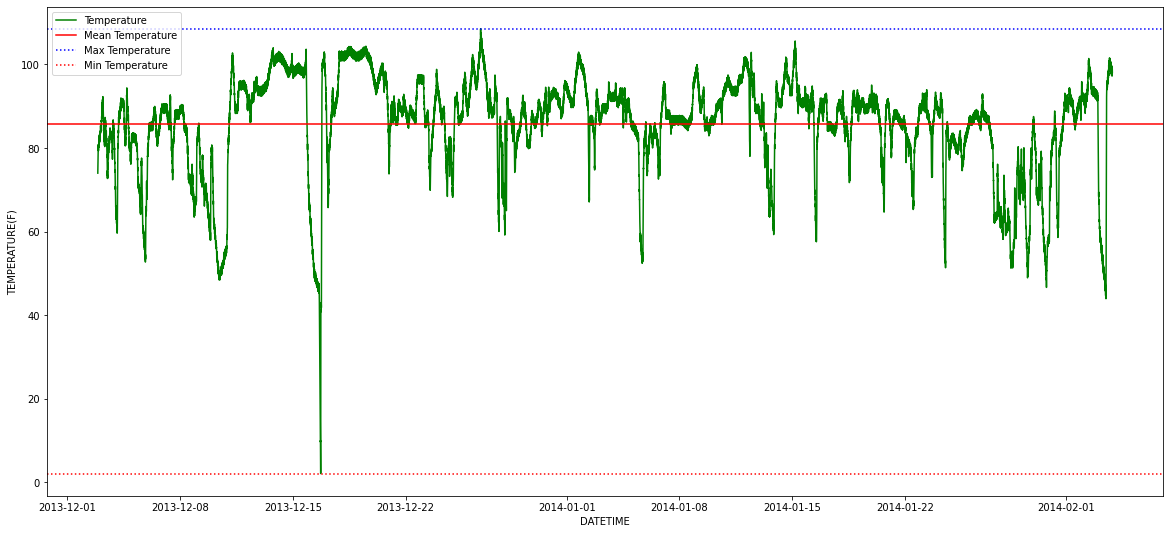

In [7]:
plt.rcParams["figure.figsize"] = (20,9)
plt.plot(df['timestamp'], df['value'], color='g', label='Temperature')
plt.axhline(y = df['value'].mean(), color = 'r', linestyle = '-',label='Mean Temperature')
plt.axhline(y = df['value'].max(), color = 'b', linestyle = 'dotted',label='Max Temperature')
plt.axhline(y = df['value'].min(), color = 'r', linestyle = 'dotted',label='Min Temperature')
plt.xlabel('DATETIME')
plt.ylabel('TEMPERATURE(F)')
plt.legend()
plt.show()

From this boxplot we can see how deep our anomalies value to minimal value of temperature. It is hard to tell if the higher value (90 or 100 above) is considered as anomalies.

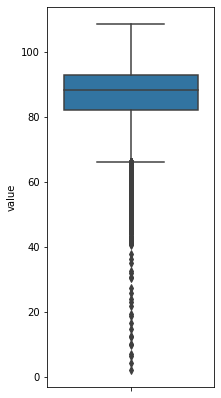

In [49]:
plt.rcParams["figure.figsize"] = (3,7)
sns.boxplot(y=train['value'])
plt.show()

In this Boxplot below, we could see, after we perform Isolation Forest and gives the anomaly label, there are still some outliers on non-anomaly data. But its range quite small and it shows us outliers from higher value (above 100 temperature)

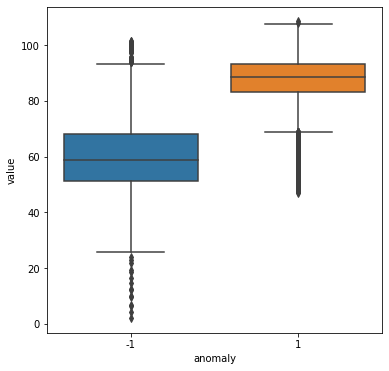

In [52]:
plt.rcParams["figure.figsize"] = (6,6)
sns.boxplot(y=train['value'], x=train['anomaly'])
plt.show()

In [53]:
def anomaly_plot(df):
    """
    this is the visualization for anomaly data

    returns: plot for anomaly data
    """    
    plt.rcParams["figure.figsize"] = (20,7)
    fig, ax1 = plt.subplots()

    ax1.plot(df['timestamp'],df['value'], 'g-', label='temp')

    a = df.loc[df['anomaly'] == -1, ['timestamp','value']] #anomaly
    ax1.scatter(a.timestamp,a['value'], color='red', label = 'Anomaly')

    ax1.set_xlabel('timestamp')
    ax1.set_ylabel('temperature', color='g')

    plt.legend()
    plt.show()

This is the result of anomaly detection on Train data. As we could see there are still data points of anomaly that didn't perform well especially at the last of dates and some higher value data points.

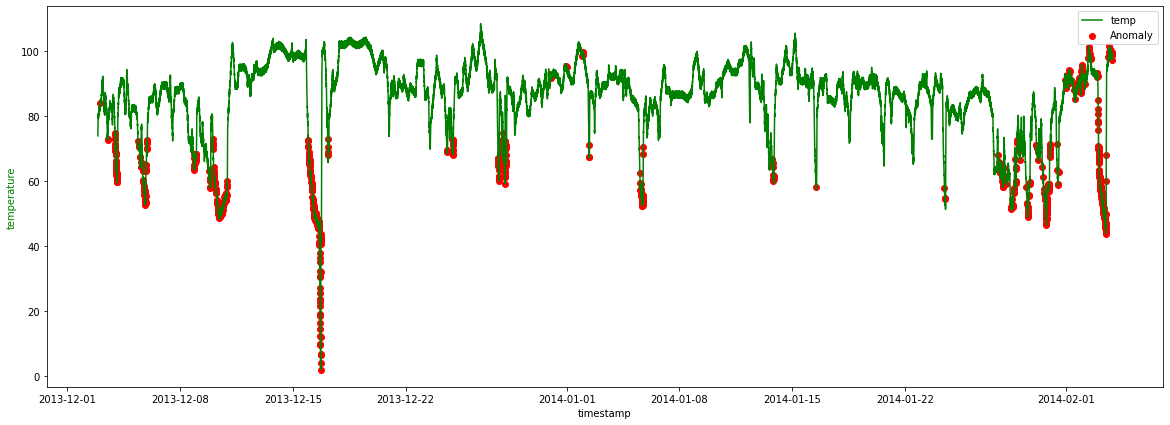

In [26]:
#train plot
anomaly_plot(train)

Meanwhile our result on Test data did'nt perform quite well too. Like there's still many data points that not an outliers but considered as outliers. But the detection on outliers that far from the mean is quite well.

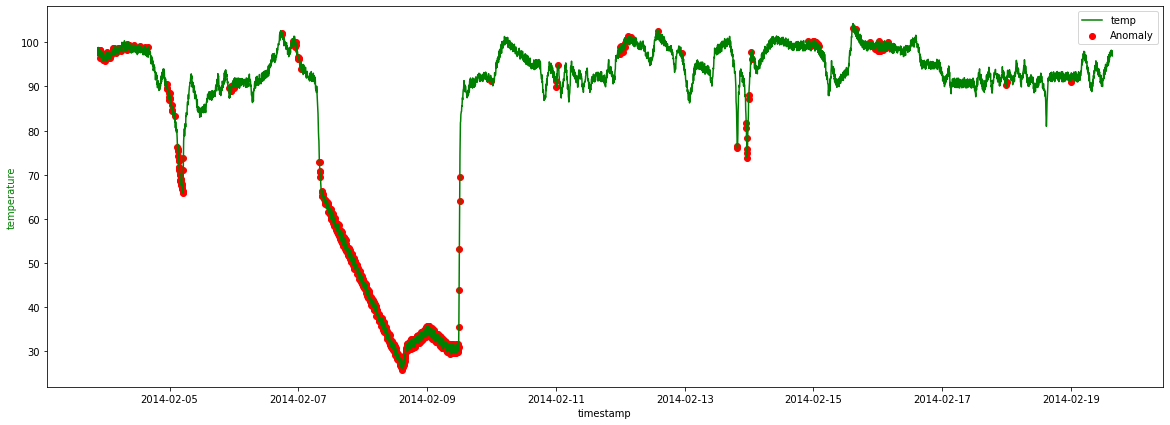

In [54]:
#test plot
anomaly_plot(test)

this the same data with better visualization using scatter plot.

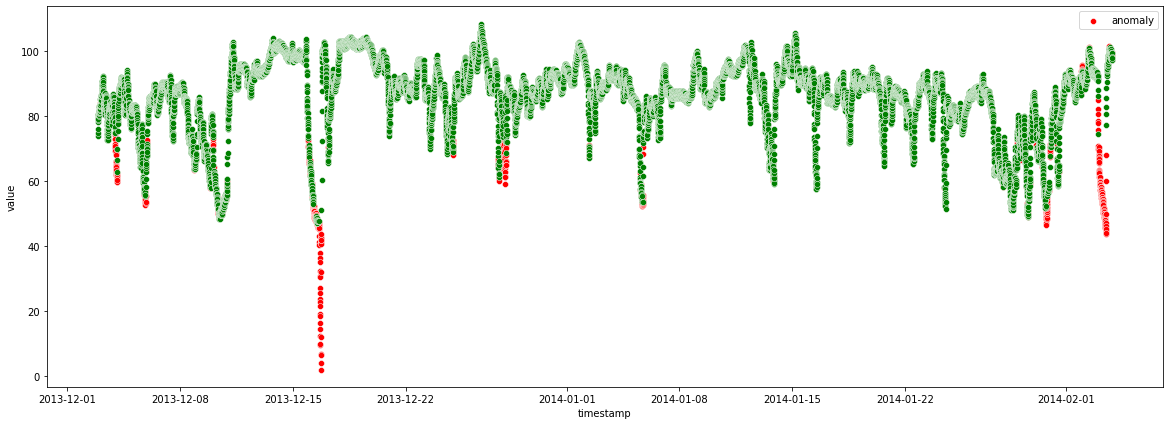

In [20]:
from cProfile import label


plt.rcParams["figure.figsize"] = (20,7)
fig, ax1 = plt.subplots()
sns.scatterplot(x=df[df['anomaly']==-1]['timestamp'], y=df[df['anomaly']==-1]['value'], color='r', label="anomaly")
sns.scatterplot(x=df[df['anomaly']==1]['timestamp'], y=df[df['anomaly']==1]['value'], color='g')
plt.show()


This is the visualization of the score from the Isolation Forest Decision Function. It gives some score to data point and then consider the score that below 0 is anomaly.

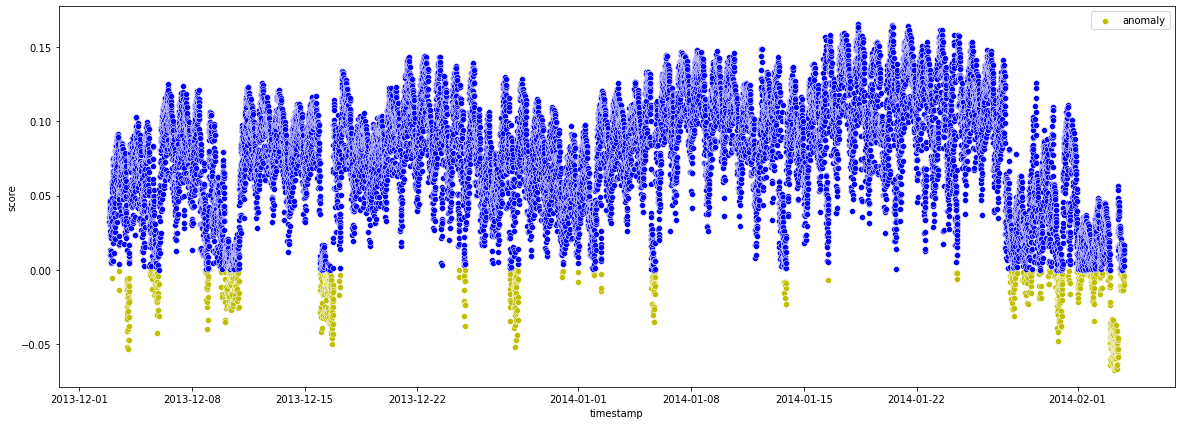

In [19]:
from cProfile import label


plt.rcParams["figure.figsize"] = (20,7)
fig, ax1 = plt.subplots()
sns.scatterplot(x=df[df['anomaly']==-1]['timestamp'], y=df[df['anomaly']==-1]['score'], color='y', label="anomaly")
sns.scatterplot(x=df[df['anomaly']==1]['timestamp'], y=df[df['anomaly']==1]['score'], color='b')
plt.show()


For other comparation, I tried visualize the k-means algorithm to see how it perform if just labelling with a clusters.

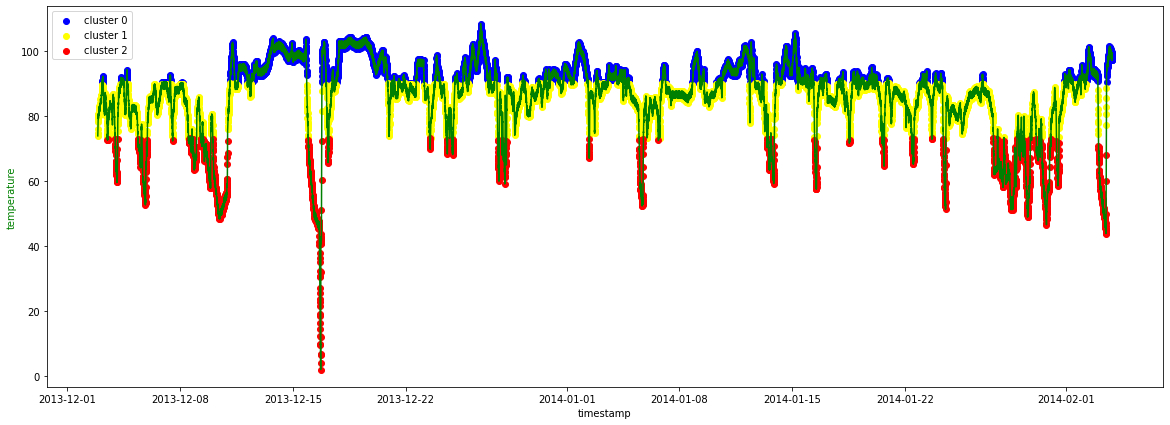

In [24]:
import matplotlib.pyplot as plt

train_clustered = joblib.load("../output/train_clustered.pkl")

plt.rcParams["figure.figsize"] = (20,7)
fig, ax1 = plt.subplots()

ax1.plot(df['timestamp'],df['value'], 'g-')

a = df.loc[df['cluster'] == 0, ['timestamp','value']]
ax1.scatter(a.timestamp,a['value'], color='b', label = 'cluster 0')

b = df.loc[df['cluster'] == 1, ['timestamp','value']]
ax1.scatter(b.timestamp,b['value'], color='yellow', label = 'cluster 1')

c = df.loc[df['cluster'] == 2, ['timestamp','value']]
ax1.scatter(c.timestamp, c['value'], color='r', label = 'cluster 2')

ax1.set_xlabel('timestamp')
ax1.set_ylabel('temperature', color='g')

plt.legend()
plt.show()
